# RLab02 - Gabriele Bertinelli (2103359)

In [1]:
library(tidyverse)
library(gridExtra)

set.seed(2103359)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Caricamento pacchetto: 'gridExtra'


Il seguente oggetto è mascherato da 'package:dplyr':

    combine




#### 1) 
**1.1)**

In [3]:
# define the PDF. returns a vector of values
dpois.m <- function(x, lambda) {

	sapply(x, function(x) {
		if (x < 1) return(0)

		(lambda^x * exp(-lambda)) / (factorial(x) * (1-exp(-lambda)))
	})
}

# define the CDF. returns a vector of values
ppois.m <- function(x, lambda) {

	sapply(x, function(x) {
		if (x < 1) return(0)
		sum(sapply(1:x, function(i) dpois.m(i, lambda)))
	})
}

**1.2)**

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]

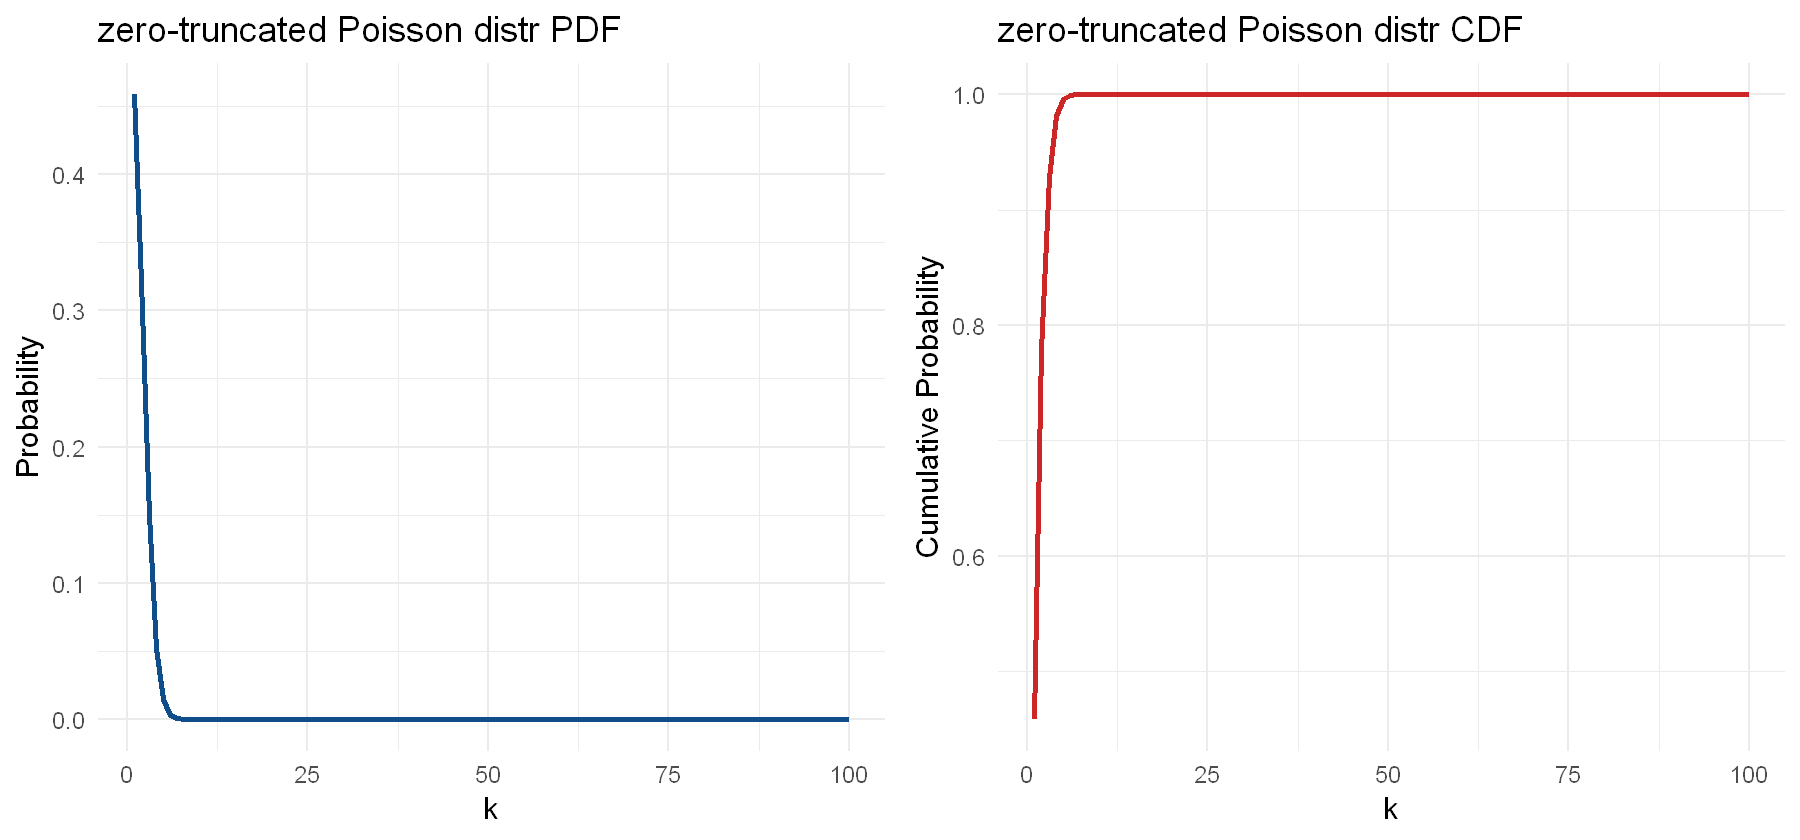

In [4]:
# Create the data frame
k_val <- 1:100
lambda <- 1.4
pdf <- dpois.m(k_val, lambda)
cdf <- ppois.m(k_val, lambda)
df <- data.frame(k = k_val, pdf = pdf, cdf = cdf)

options(repr.plot.width = 15, repr.plot.height = 7)

# Plot for PDF
pdf_plot <- ggplot(df, aes(x = k, y = pdf)) +
	# geom_bar(bins = length(df$k), fill = "lightblue", alpha = 1, stat = "identity", color='ivory') +
	geom_line(lwd=1.5, color='dodgerblue4') +
	labs(title = "zero-truncated Poisson distr PDF",
			 x = "k",
			 y = "Probability") +
	theme_minimal(base_size = 18)

# Plot for CDF
cdf_plot <- ggplot(df, aes(x = k, y = cdf)) +
	geom_line(lwd=1.5, color='firebrick3') +
	labs(title = "zero-truncated Poisson distr CDF",
			 x = "k",
			 y = "Cumulative Probability") +
	theme_minimal(base_size = 18)

# Arrange the plots side by side
combined_plot <- grid.arrange(pdf_plot, cdf_plot, ncol = 2)

# Display the combined plot
combined_plot


**1.3)**

In [5]:
mean_val <- sum(df$k * df$pdf) # mean value -> discrete func (if continuous, integrate)

variance1 <- sum((df$k - mean_val)^2 * df$pdf) # variance -> discrete func (if continuous, integrate)
variance2 <- sum(df$k^2 * df$pdf) - mean_val^2 

cat("Mean value: ", mean_val, "\n")
cat("Variance (method 1): ", variance1, "\n")
cat("Variance (method 2): ", variance2, "\n")

Mean value:  1.858235 
Variance (method 1):  1.006726 
Variance (method 2):  1.006726 


**1.4)**

In [6]:
# Define the inverse CDF
qpois.m <- function(p, lambda) {
	k <- 0
	while (TRUE) {
		if (ppois.m(k, lambda) >= p) { # inverse cdf -> find k s.t. cdf >= prob p
		return(k)
		}
		k <- k + 1
	}
}

# Sample from the custom Poisson distribution using inverse sampling
rpois.m <- function(n, lambda) {

	u <- runif(n)  # Generate n uniform random numbers
	
	samples <- sapply(u, function(p) qpois.m(p, lambda))  # Use inverse CDF to inverse sample
	
	return(samples)
}


Samples mean =  1.846

Warning message:
"A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead."


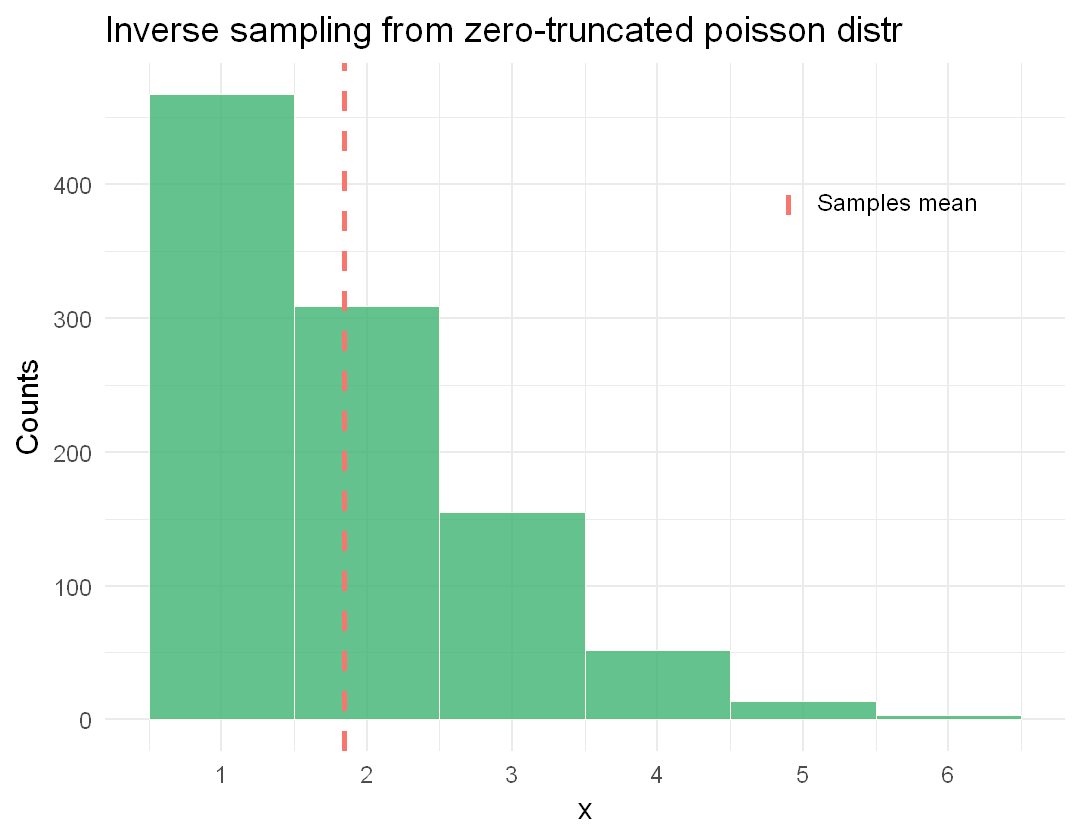

In [7]:
n_samples <- 1000

samples <- data.frame(x = rpois.m(n_samples, lambda))

samples_mean <- mean(samples$x)
cat('Samples mean = ', samples_mean)


options(repr.plot.width = 9, repr.plot.height = 7)
sample_hist <- ggplot(data=samples, aes(x=x)) +
	geom_histogram(binwidth=1, fill='mediumseagreen', color='ivory', alpha=0.8) +
	geom_vline(aes(xintercept = samples_mean, color = "Samples mean"), lwd=1.5, linetype = "dashed") +
	labs(title = "Inverse sampling from zero-truncated poisson distr",
			 x = "x", y = "Counts") +
	scale_x_continuous(breaks = seq(min(samples$x), max(samples$x), by = 1)) +
	theme_minimal(base_size = 18) +
	theme(legend.position = c(0.8, 0.8), legend.title = element_blank()) 

sample_hist

#### 2)
**2.1)**

In [2]:
dmuon_n <- function(E, E0 = 7.25, gamma = 2.7) {
    ifelse(E < E0, 1, (E - E0 + 1)^(-gamma))
}

integral_n <- integrate(dmuon_n, 0, Inf)  # Using quad function for numerical integration

N <- 1 / integral_n$value

print(paste('Normalization factor N:', N))

[1] "Normalization factor N: 0.127579703198913"


**2.2)**

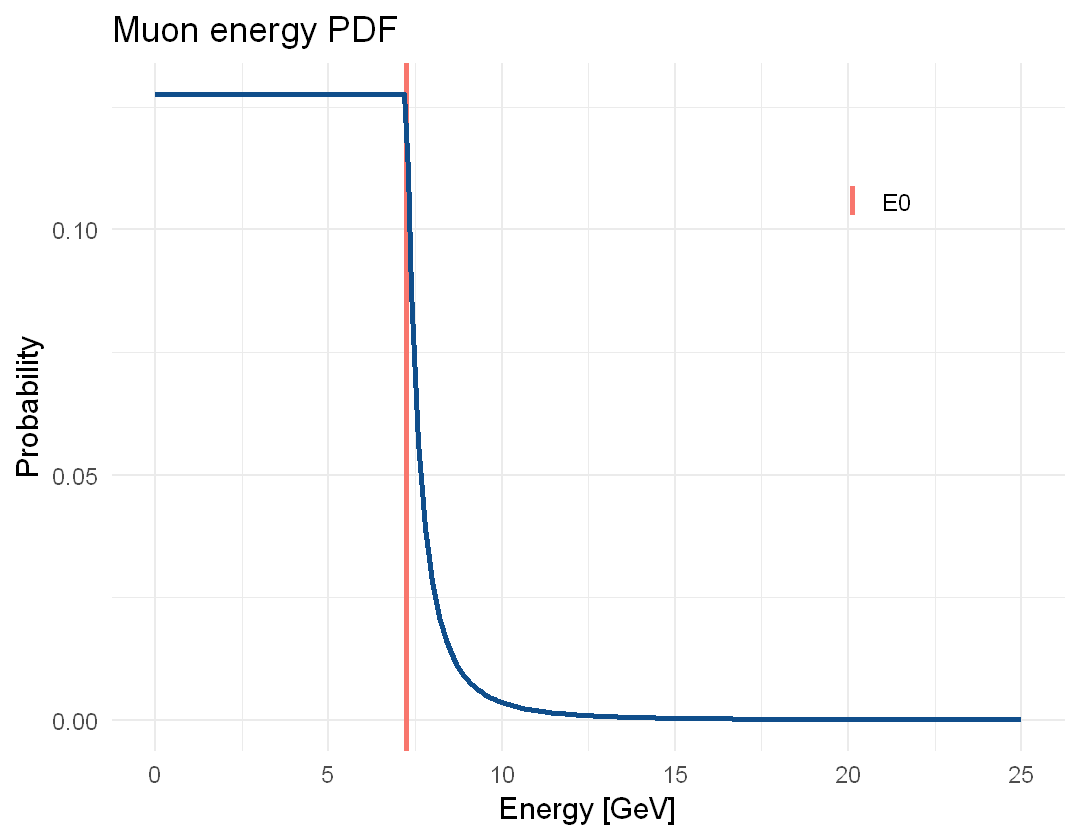

In [10]:
dmuon <- function(E, E0 = 7.25, gamma = 2.7) {
    ifelse(E < E0, N, N*(E - E0 + 1)^(-gamma))
}

e_val <- seq(0, 25, 0.1) # GeV

muon_pdf <- data.frame(en = e_val, prob = dmuon(e_val))

options(repr.plot.width = 9, repr.plot.height = 7)

pdf_plot <- ggplot(data=muon_pdf, aes(x=en, y=prob)) + 
	geom_vline(aes(xintercept = 7.25, color='E0'), lwd=1.5, linetype = "solid") +
	geom_line(color='dodgerblue4', lwd=1.5) +
	labs(title = "Muon energy PDF",
			 x = "Energy [GeV]", y = "Probability") +
	theme_minimal(base_size = 18) + 
	theme(legend.title = element_blank(), legend.position = c(0.8, 0.8))

pdf_plot

**2.3)**

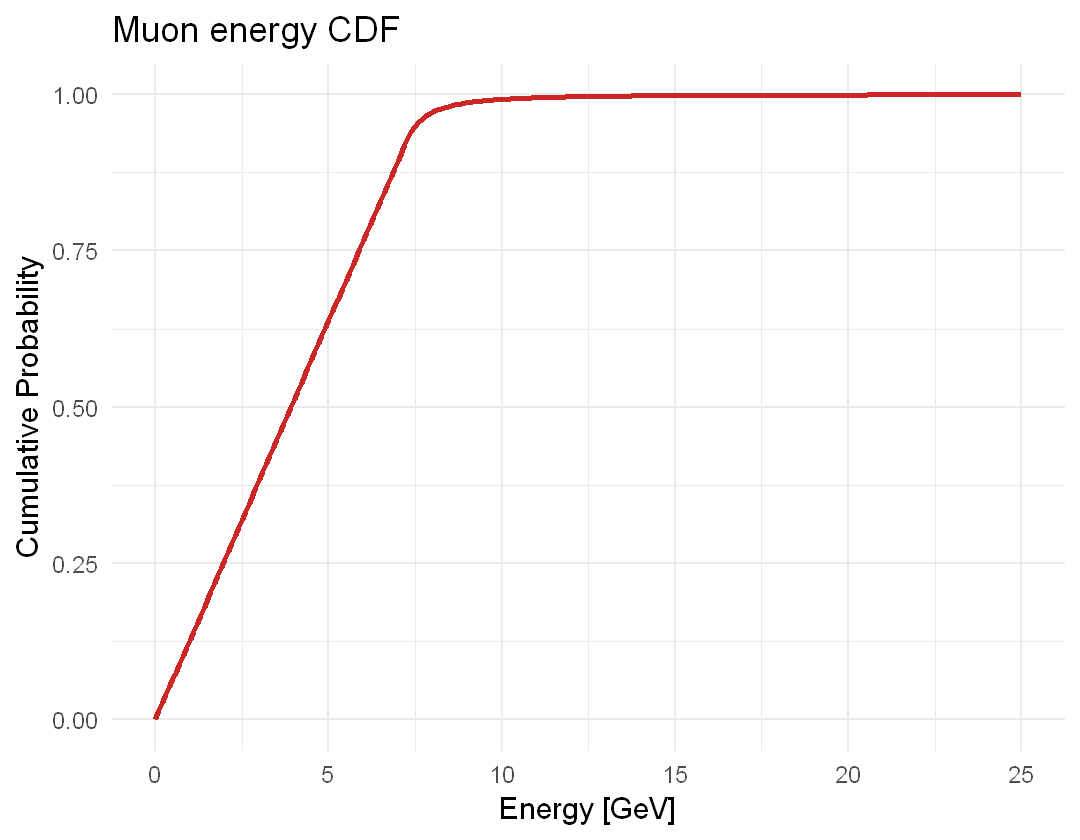

In [11]:
pmuon <- function(E, E0 = 7.25, gamma = 2.7) {

    sapply(E, function(E_val) integrate(dmuon, lower = 0, upper = E_val)$value)

}

muon_cdf <- data.frame(en = e_val, prob = pmuon(e_val))

options(repr.plot.width = 9, repr.plot.height = 7)

cdf_plot <- ggplot(data=muon_cdf, aes(x=en, y=prob)) + 
	geom_line(color='firebrick3', lwd=1.5) +
	labs(title = "Muon energy CDF",
			 x = "Energy [GeV]", y = "Cumulative Probability") +
	theme_minimal(base_size = 18) + 
	theme(legend.title = element_blank(), legend.position = c(0.8, 0.8))

cdf_plot

**2.4)**

In [12]:
mean_value <- integrate(function(E) E * dmuon(E), 0, Inf)$value

sprintf('Mean value = %.3f GeV', mean_value)

[1] "Mean value = 4.004 GeV"

**2.5)**

In [13]:
qmuon <- function(p, E0 = 7.25, gamma = 2.7) {
	E <- 0
	while (TRUE) {
		if (pmuon(E) >= p) {
			return(E)
		}
		E <- E + 0.1
	}
}

rmuon <- function(n, E0 = 7.25, gamma = 2.7) {
	u <- runif(n)
	samples <- sapply(u, function(p) qmuon(p))
	return(samples)
}

In [14]:
n_sampl <- 10000

samples <- data.frame(samples = rmuon(n_sampl))

Warning message:
"Removed 15 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`)."
Warning message:
"Removed 50 rows containing missing values or values outside the scale range
(`geom_line()`)."


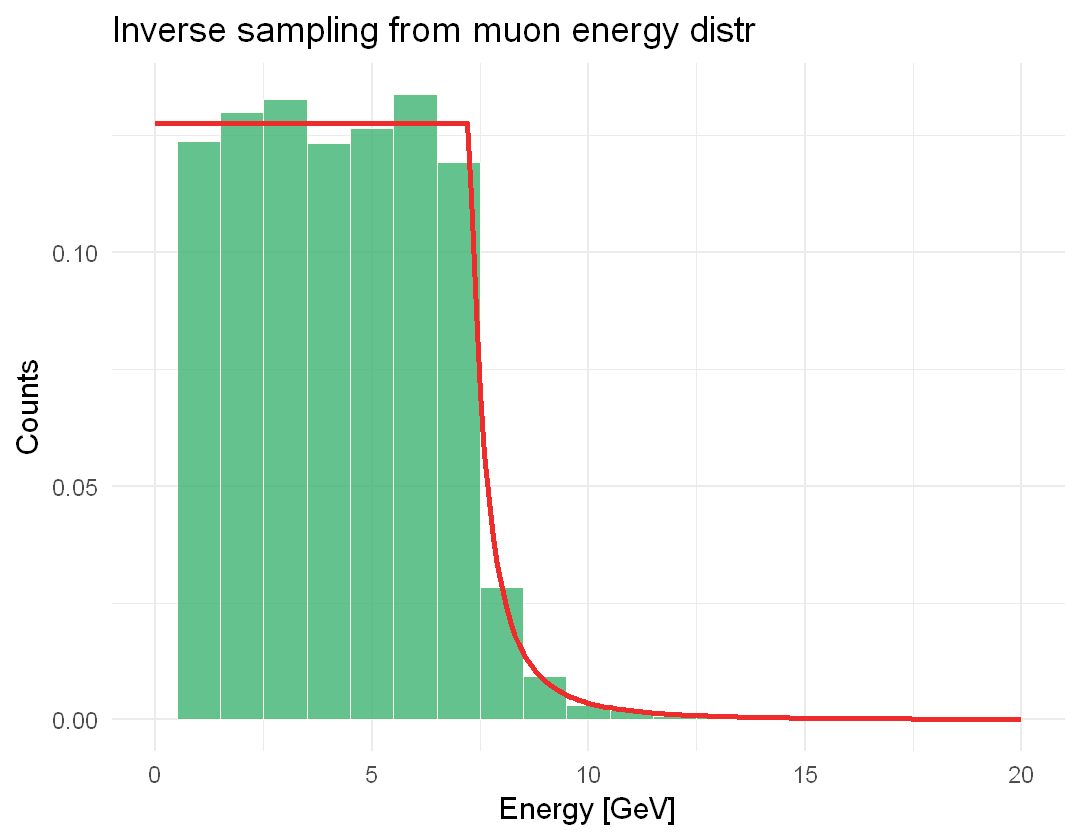

In [15]:
options(repr.plot.width = 9, repr.plot.height = 7)

samples_hist <- ggplot(data=samples, aes(x=samples)) +
	geom_histogram(aes(y = after_stat(density)), binwidth=1, fill='mediumseagreen', color='ivory', alpha=0.8) +
	geom_line(data=muon_pdf, aes(x=en, y=prob), color='firebrick2', lwd=1.5) +
	labs(title = "Inverse sampling from muon energy distr",
			 x = "Energy [GeV]", y = "Counts") +
	xlim(c(0,20)) +
	theme_minimal(base_size = 18)

samples_hist

#### 3)
**3.1)**

In [16]:
mu <- 2 # per day

k <- 5 

m_ineq <- mu/k

cat('Markov inequality -> prob that tmrw will occur >= 5 incidents is <= ', m_ineq, '\n')

Markov inequality -> prob that tmrw will occur >= 5 incidents is <=  0.4 


**3.2)**

In [29]:
t <- 1/1
pois.lambda <- mu*t
k <- 5

pois <- 1 - ppois(k-1, pois.lambda) # at least k -> 1 - cdf(k-1)

cat('Poisson distr -> prob that tmrw will occur 5 incidents is ', pois, '\n')

Poisson distr -> prob that tmrw will occur 5 incidents is  0.05265302 


**3.3)**

In [27]:
var <- 2
k <- 5
cheb <- var/(k^2)

cat('Chebyshev inequality -> prob that tmrw will occur >= 5 incidents is <= ', cheb, '\n')

Chebyshev inequality -> prob that tmrw will occur >= 5 incidents is <=  0.08 


#### 4)  
**First method**  
I suppose that the variable follows a Poisson distribution so $E[x] = \lambda = var(x)$ with $rate=1/mean$.  
Therefore the probability of waiting a # of days ($X$) less or equal to the days in advance ($x$) is $P(X\le x) = CDF(x)$.  
So, $x_{waiting} = \min{x}\quad s.t.\quad P(X\le x) >= 0.95$ (we use the $>$ because we cannot have a perfect equality since probabilities are continuous variables)

To be sure at 95% should order the book 21 days in advance


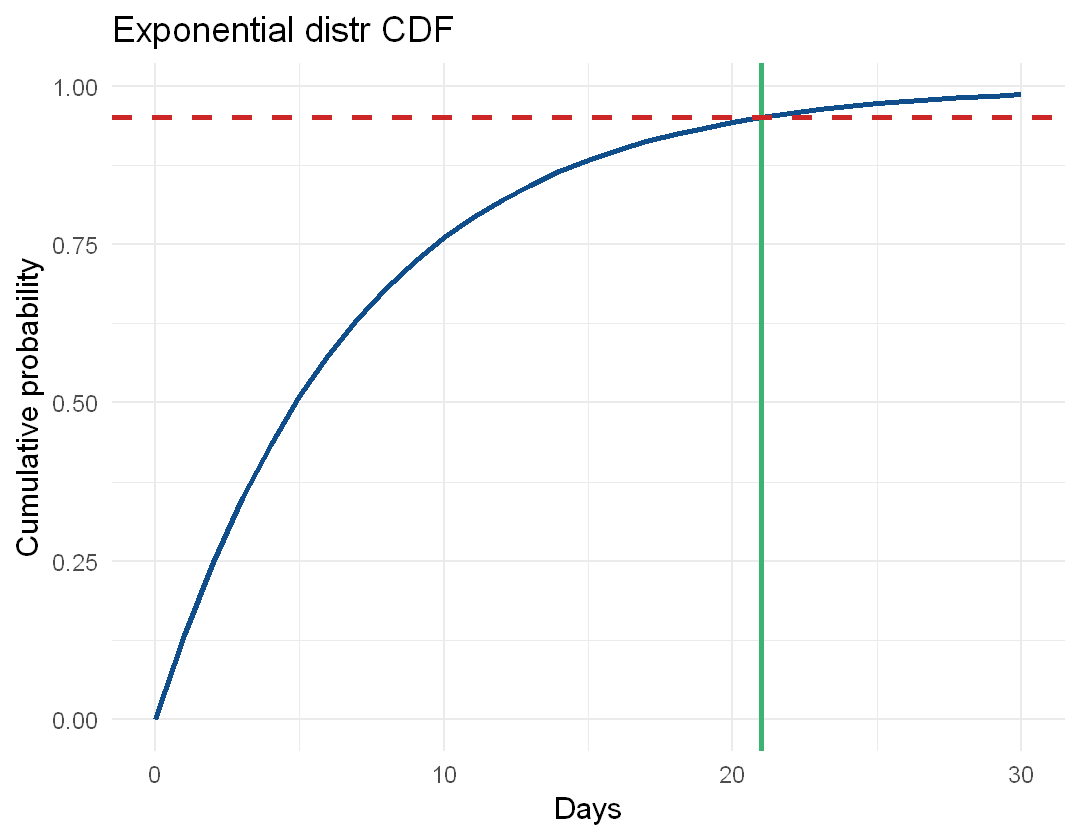

In [3]:
mean <- 7 # days
std <- 2 # days

lvl <- 0.95 # Helen wants to be 95% sure

t <- 0:30
exp_cdf <- pexp(q=t, rate=1/mean)
exp_df <- data.frame(t=t, exp=exp_cdf)

w_days <- min(exp_df$t[exp_df$exp >= lvl])

cat('To be sure at 95% should order the book', w_days, 'days in advance\n')

options(repr.plot.width = 9, repr.plot.height = 7)

hist_plot <- ggplot(data=exp_df, aes(x=t, y=exp)) +
	geom_line(color='dodgerblue4', lwd=1.5) +
	# geom_vline(xintercept = mean, color='firebrick3', lwd=1.5) +
	# geom_vline(xintercept = mean + qexp(0.975, rate=1/mean), color='firebrick3', lwd=1.5, linetype='dashed') +
	# geom_vline(xintercept = mean - qexp(0.975, rate=1/mean), color='firebrick3', lwd=1.5, linetype='dashed') +
	geom_vline(xintercept = w_days, color='mediumseagreen', lwd=1.5) +
	geom_hline(yintercept = lvl, color='firebrick3', lwd=1.5, linetype='dashed') +
	labs(title = "Exponential distr CDF",
			 x = "Days", y = "Cumulative probability") +
	theme_minimal(base_size = 18)

hist_plot

**Second method**  
This time I suppose that our variable is distributed as a normal random variable with mean and std given.  
I consider the 95% probability as the 95%-percentile
I use `qnorm` which gives the value of the variable $x$ corresponding to the upper tail of the 95%-percentile.
Therefore $x$ is the minimum number of days before the desired date such that Helen can be 95% sure that she will receive the book by that date.

In [52]:
x <- qnorm((1+0.95)/2, mean = mean, sd = std) # I calculate the upper tail of the 95%-percentile

cat('To be sure at 95% should order the book', round(x, 2), 'days in advance\n')

To be sure at 95% should order the book 10.92 days in advance


Here I consider the 95% as the area of the distribution centered on the mean. I calculate the lower and upper quantiles corresponding to the area considered.  

I'm pretty sure this is the wrong approach because we have to consider the 95% starting from the start of the distribution, and not as the central value.

In [53]:
# Calculate the proportion of each tail
tail <- (1 - 0.95) / 2

lower_quantile <- qnorm(tail, mean = mean, sd = std)
upper_quantile <- qnorm(1 - tail, mean = mean, sd = std)

# Print the result
print(lower_quantile)
print(upper_quantile)

[1] 3.080072
[1] 10.91993


#### 5)  

Since there are 26 pairs and we are interested in the probability of at most 10 pairs being black and red, we can model this as a binomial distribution with parameters `n = 26` (the number of trials, or pairs) and `p = 0.5` (the probability of success, or a pair being black and red, assuming a fair deck).  

We need the mean and the variance -> `mean = np`, `var = np(1-p)`  

C. ineq is $P(|X-\mu|\ge k\sigma) \le \frac{1}{k^2}$

In [56]:
n_cards <- 52
n_pairs <- 26
prob <- 0.5
obj <- 10

mean <- n_pairs*prob
var <- n_pairs*prob*(1-prob)
std <- sqrt(var)

k <- abs(obj-mean)/std

cheb <- 1/k^2 

# P(∣X−13∣>= 3)<= 1/k^2

cat('Chebyshev inequality -> prob that the number of pairs is at most 10 is <= ', round(cheb, 2), '\n')

Chebyshev inequality -> prob that the number of pairs is at most 10 is <=  0.72 


Assuming these are binomial random variables, we get:  

$P(X \leq 10) = \sum_{k=0}^{10} \binom{26}{k} (0.5)^k (0.5)^{26-k}$

In [65]:
n <- 26 # Number of trials (pairs)
p <- 0.5 # Probability of success (black and red pair)

at_most_10 <- pbinom(q=10, size=n, prob=p)

# Print the result
cat('Binomial variables -> prob that the number of pairs is at most 10 is ~', round(at_most_10, 2), '\n')

Binomial variables -> prob that the number of pairs is at most 10 is ~ 0.16 
